보간하는 방법 사용

### 경로 데이터 불러오기 / 보간

In [2]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

filenames = []
# CSV 파일에서 경로 데이터를 추출하는 함수
def extract_lat_lng_from_csv(directory):
    all_lat_lng_lists = []
    file_count = 0
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filenames.append(filename)
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            lat_lng_list = [(row['lat'], row['lng']) for index, row in df.iterrows()]
            all_lat_lng_lists.append(lat_lng_list)
    return all_lat_lng_lists
 
# 경로 데이터를 보간하여 동일한 길이로 만드는 함수
def interpolate_path(path, num_points=10):
    latitudes = [point[0] for point in path]
    longitudes = [point[1] for point in path]
    distances = np.linspace(0, 1, len(path))
    interp_lat = interp1d(distances, latitudes, kind='linear')
    interp_lon = interp1d(distances, longitudes, kind='linear')
    new_distances = np.linspace(0, 1, num_points)
    new_latitudes = interp_lat(new_distances)
    new_longitudes = interp_lon(new_distances)
    return np.column_stack((new_latitudes, new_longitudes)).flatten()
 
# 경로 데이터를 읽어오는 경로 설정
directory_path = "../어디쉐어/어디쉐어 dbscan"
lat_lng_values = extract_lat_lng_from_csv(directory_path)
 
# 보간된 경로 벡터들
path_vectors = np.array([interpolate_path(path) for path in lat_lng_values])
print('path_vectors'),path_vectors

path_vectors


(None,
 array([[ 37.537137  , 126.649466  ,  37.53705567, ..., 126.648871  ,
          37.53784   , 126.648342  ],
        [ 37.5336    , 126.653452  ,  37.53392489, ..., 126.653194  ,
          37.535062  , 126.653194  ],
        [ 37.53191   , 126.647907  ,  37.531899  , ..., 126.646855  ,
          37.531881  , 126.646855  ],
        ...,
        [ 37.644554  , 127.680359  ,  37.644554  , ..., 127.680359  ,
          37.644554  , 127.680359  ],
        [ 37.685359  , 127.530572  ,  37.65593678, ..., 127.000507  ,
          37.511416  , 127.000507  ],
        [ 37.538301  , 126.646906  ,  37.53831322, ..., 126.646967  ,
          37.538356  , 126.646967  ]]))

### 경로 데이터 시각화 (입력 데이터)

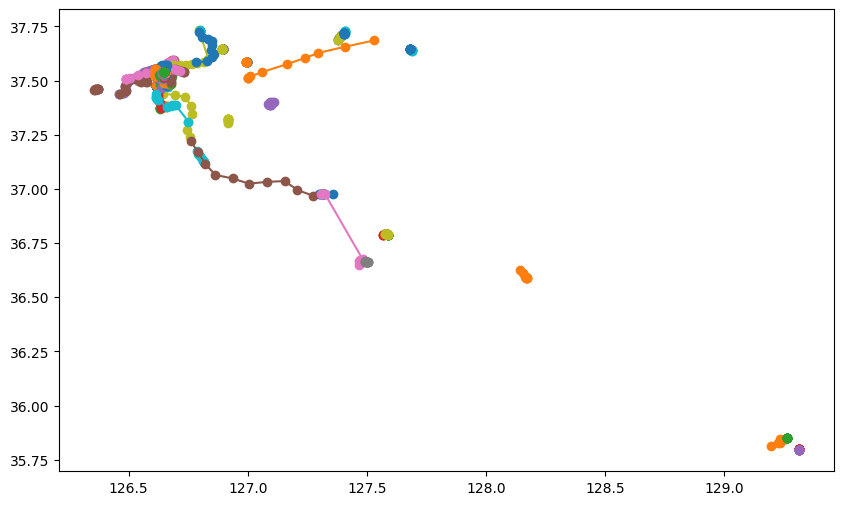

In [3]:
# 경로 벡터 시각화
plt.figure(figsize=(10, 6))

for i, path in enumerate(path_vectors):
    latitudes = path[::2]  # 짝수 인덱스는 위도
    longitudes = path[1::2]  # 홀수 인덱스는 경도
    plt.plot(longitudes, latitudes, marker='o', label=f'Path {i+1}')

### DBSCAN 모델로 이상치 판단 및 시각화 (출력 데이터)

count 76


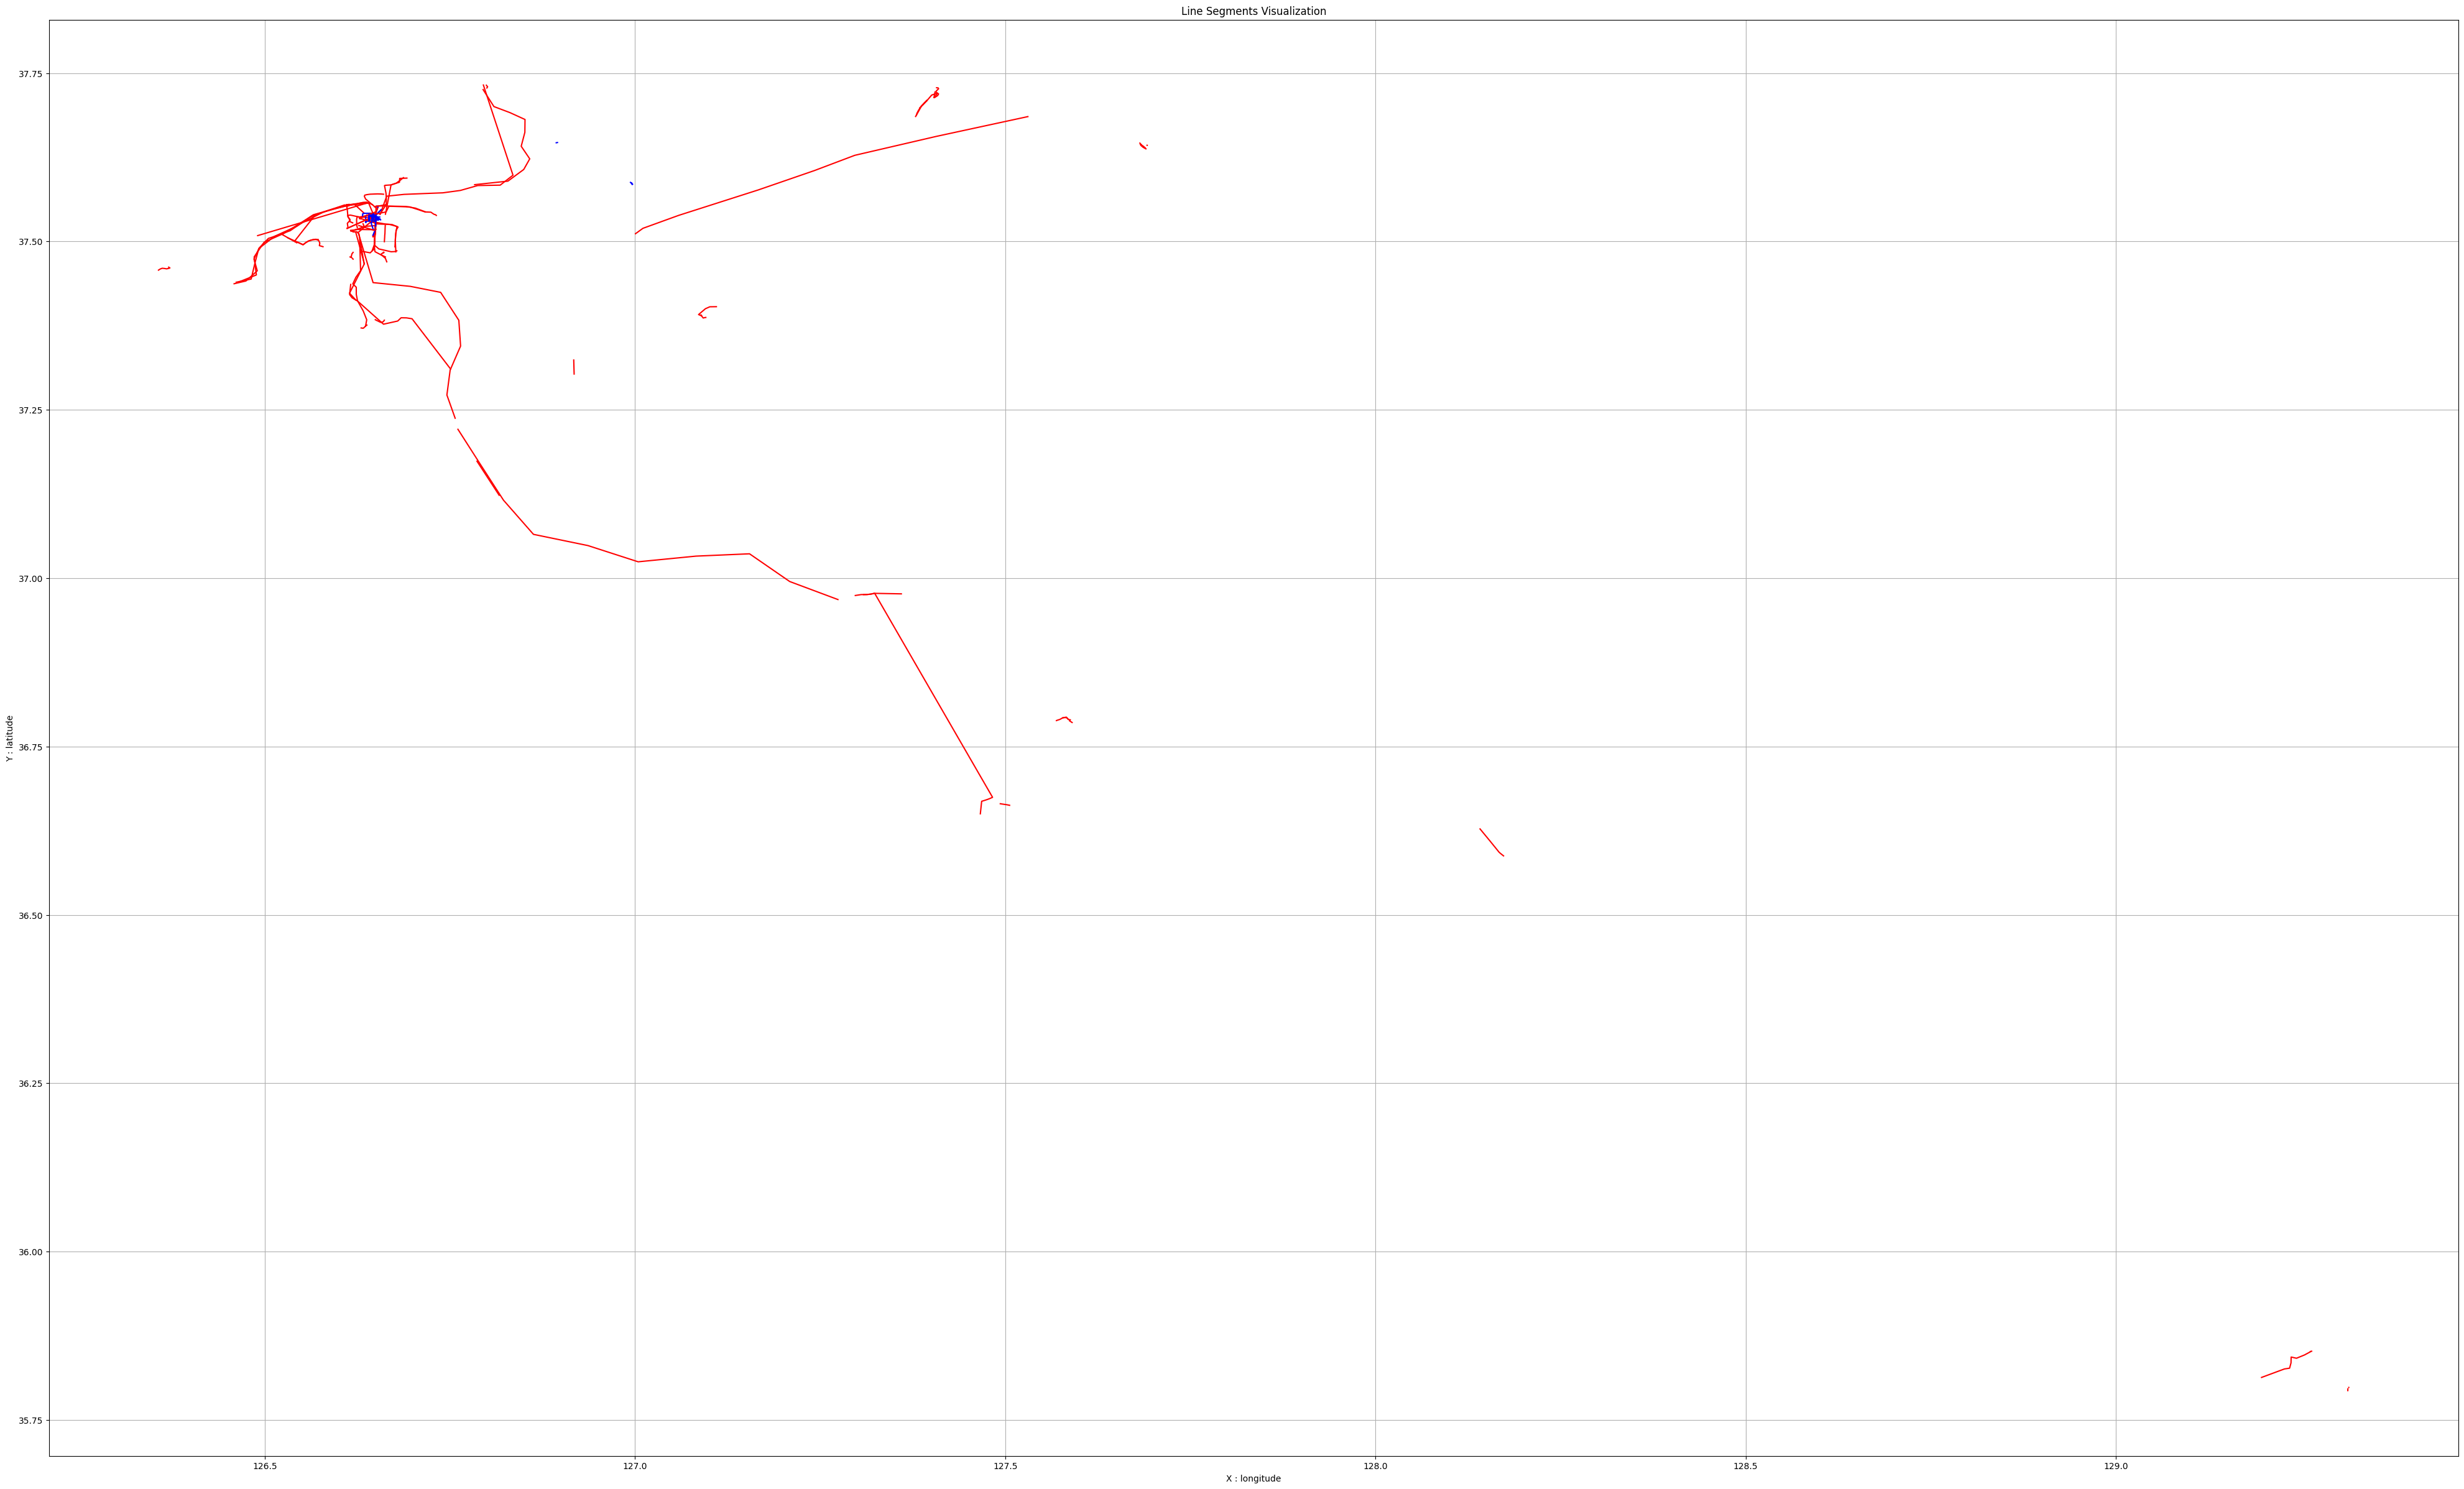

In [4]:
dbscan = DBSCAN(eps=0.022, min_samples=4)
labels = dbscan.fit_predict(path_vectors)

count=0
for l in labels:
    if l == -1:
        count += 1 

print('count',count)

plt.figure(figsize=(50, 30))
# 시각화
for segment, label in zip(path_vectors, labels):
    x_coords = segment[1::2]
    y_coords = segment[0::2]
    color = 'red' if label == -1 else 'blue'
    plt.plot(x_coords, y_coords, color=color)

plt.title('Line Segments Visualization')
plt.xlabel('X : longitude')
plt.ylabel('Y : latitude')
plt.grid(True)
plt.show()

### 이상치 여부를 원본 CSV 파일에 기록

In [5]:
# 이상치 여부를 'dbscan output' 열에 기록하는 함수

def record_outliers(directory, labels, filenames):
 
    for label, filename in zip(labels, filenames):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        if 'dbscan output' not in df.columns:
            df['dbscan output'] = 1  # 기본값 1로 설정
        if label == -1:
            df['dbscan output'] = -1  # 이상치일 경우 -1로 설정
        df.to_csv(filepath, index=False)

# 이상치 여부를 CSV 파일에 기록
record_outliers(directory_path, labels, filenames)


### DBSCAN 이상경로 파일명 출력

In [6]:
# 이상경로 파일명을 텍스트로 출력하는 함수
def print_outlier_paths_with_filenames(labels, filenames):
    print('--------outlier_paths--------')
    for label, filename in zip(labels, filenames):
        if label == -1:
            print(filename)

# 이상경로 파일명을 텍스트로 출력
outlier_paths = print_outlier_paths_with_filenames(labels, filenames)


--------outlier_paths--------
20230415140615.csv
20230429074729.csv
20230429084545.csv
20230430160248.csv
20230430184009.csv
20230430190656.csv
20230430220837.csv
20230505122016.csv
20230505122923.csv
20230505125302.csv
20230505150709.csv
20230505155515.csv
20230506175525.csv
20230508084115.csv
20230508162818.csv
20230520133735.csv
20230520140330.csv
20230527142308.csv
20230527205922.csv
20230527221824.csv
20230610213658.csv
20230610214706.csv
20230617180215.csv
20230617185438.csv
20230617202603.csv
20230617212016.csv
20230617213908.csv
20230701212705.csv
20230701220126.csv
20230707194508.csv
20230708184137.csv
20230708211224.csv
20230710075720.csv
20230715124434.csv
20230715132948.csv
20230715154101.csv
20230715194033.csv
20230716140812.csv
20230718211727.csv
20230729172838.csv
20230806153057.csv
20230806155355.csv
20230806165357.csv
20230809134547.csv
20230809184452.csv
20230812122439.csv
20230812125121.csv
20230813201825.csv
20230814113500.csv
20230819160747.csv
20230819164201.csv
2

## 비지도, 지도 비교를 위한 csv파일

### dbscan output을{inputdata} output.csv에 기록

In [7]:
import pandas as pd
import os

# 파일 경로 설정
output_file = '위드라이브user1 output.csv'

# 파일이 존재하는지 확인
if not os.path.isfile(output_file):
    raise FileNotFoundError(f"The file at {output_file} does not exist.")

# 파일 읽기 시도
try:
    df = pd.read_csv(output_file)
except pd.errors.EmptyDataError:
    print(f"The file at {output_file} is empty or does not contain valid CSV data.")
    df = pd.DataFrame()  # 빈 데이터프레임 생성
except Exception as e:
    print(f"An error occurred: {e}")
    df = pd.DataFrame()  # 빈 데이터프레임 생성

# 부족한 행 수 계산
missing_rows = len(labels) - len(df)

# 부족한 행이 있을 때
if missing_rows > 0:
    # 부족한 행을 데이터프레임에 추가
    additional_rows = pd.DataFrame(index=range(len(df), len(df) + missing_rows))
    df = pd.concat([df, additional_rows], ignore_index=True)


# 'DBSCAN output'이라는 열을 추가하고, 조건에 따라 값을 설정합니다.
df['DBSCAN output'] = ['N' if label != -1 else 'AN' for label in labels]

# 결과를 새로운 CSV 파일로 저장합니다.
df.to_csv(output_file, index=False)

print('success')


FileNotFoundError: The file at 위드라이브user1 output.csv does not exist.

### DBSCAN, GRU output match판단 및 기록

In [ ]:
import pandas as pd

# CSV 파일을 읽어옵니다.
output_file = '위드라이브user1 output.csv'

# 'match' 열을 추가하고, 조건에 따라 값을 설정합니다.
df['match'] = ['N' if gru == dbscan else 'AN' for gru, dbscan in zip(df['GRU output'], df['DBSCAN output'])]

# 변경된 내용을 원래 파일에 저장합니다.
df.to_csv(output_file, index=False)

print('success')

NameError: name 'outputfile_df' is not defined

### NM 빨간색으로 표시

In [ ]:
# import pandas as pd
# from openpyxl import load_workbook
# from openpyxl.styles import PatternFill


# # CSV 파일을 Excel 파일로 변환합니다.
# excel_filename = 'preprocessing 2.xlsx'
# df.to_excel(excel_filename, index=False)

# # Excel 파일을 불러옵니다.
# wb = load_workbook(excel_filename)
# ws = wb.active

# # 'match' 열의 값이 'NM'인 셀을 빨간색으로 변경합니다.
# fill_red = PatternFill(start_color="FF0000", end_color="FF0000", fill_type="solid")

# match_column_index = df.columns.get_loc('match') + 1  # 1-based index for openpyxl

# for row in range(2, ws.max_row + 1):  # 2번째 행부터 끝까지
#     cell = ws.cell(row=row, column=match_column_index)
#     if cell.value == 'NM':
#         cell.fill = fill_red

# # 변경된 내용을 Excel 파일에 저장합니다.
# wb.save(excel_filename)

# print('success')

### 통계 정보 출력

In [ ]:
import pandas as pd

def print_statistics(col):
    # CSV 파일을 읽어옵니다.
    df = outputfile_df()
    
    total_rows = len(df)
    count_N = df[col].value_counts().get('N', 0)
    count_AN = df[col].value_counts().get('AN', 0)

    print(f'--------{col}--------')
    print(f'total {col} : {total_rows}')
    print(f'N in {col} : {count_N}')
    print(f'AN in {col} : {count_AN}')

print_statistics('GRU output')
print_statistics('DBSCAN output')
print_statistics('match')
